In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
# print data count
print(len(iris.data))

# print feature names
print(iris.feature_names)

# print target names
print(iris.target_names)

# print first 5 records
print(iris.data[0:5])

# print first 5 targets
print(iris.target[0:5])

150
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


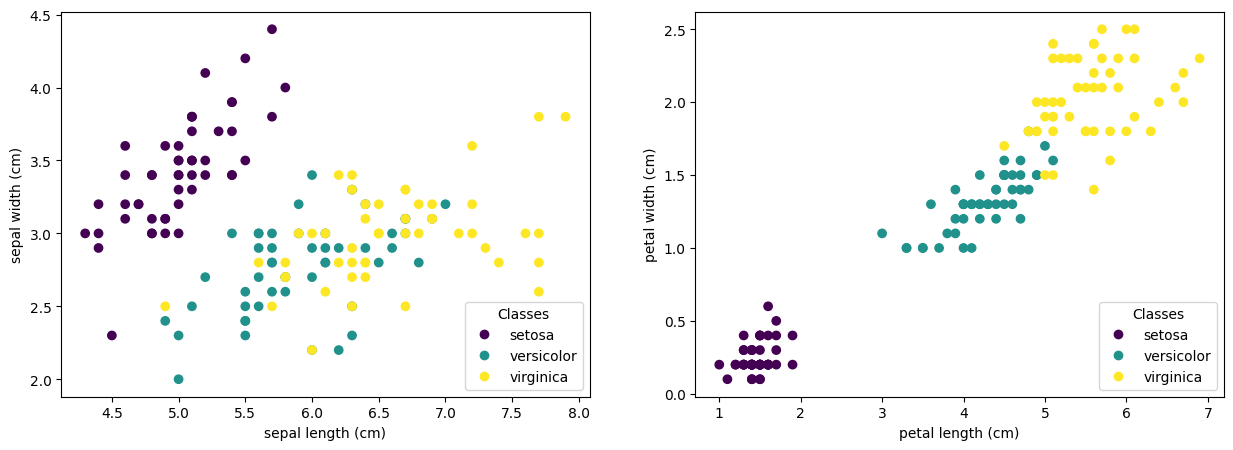

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

s0 = axs[0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
axs[0].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
axs[0].legend(s0.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

s1 = axs[1].scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
axs[1].set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
axs[1].legend(s1.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [5]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
# LLM
from openai import OpenAI
import os

str_X_train = str(X_train[0:10]).replace("\n ", "")
str_y_train = str(y_train[0:10]).replace("\n ", "")
str_X_test = str(X_train[60:70]).replace("\n ", "")
str_y_test = str(y_train[60:70]).replace("\n ", "")

API_KEY = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=API_KEY)

completion = client.chat.completions.create(
  model="gpt-3.5-turbo-0125",
  messages=[
    {"role": "system", "content": f"Act as an intelligent machine learning model. You will be given a list of vectors (X_train) and their " + 
     "corresponding target labels (y_train). Use the X_train and y_train to predict the labels for new vectors in X_test. Output predicted " +
     "labels for each vector in X_test in form of a python list nothing else."},
    {"role": "user", "content": f"X_train={str_X_train}, y_train={str_y_train}, X_test={str_X_test}"}
  ]
)

print("Predicted:", completion.choices[0].message.content.replace(",", ""))
print("Actual:", str_y_test)

Predicted: [1 2 2 2 2 1 0 0 2 2]
Actual: [1 2 1 2 2 1 0 0 2 2]


In [42]:
import re
from sklearn.metrics import classification_report

def get_list(string):
    return list(map(int, re.findall(r'\d+', string)))

predicted = get_list(completion.choices[0].message.content)
actual = get_list(str_y_test.replace(" ", ","))
                  
print(classification_report(actual, predicted, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         2
  versicolor       1.00      0.67      0.80         3
   virginica       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.94      0.89      0.90        10
weighted avg       0.92      0.90      0.89        10



In [1]:
from gptml import GPTML
import os
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

API_KEY = os.getenv("OPENAI_API_KEY")
model = GPTML(API_KEY)

model.fit(X_train, y_train)
predictions = model.predict(X_test[:10])

print(predictions)
print(y_test[:10])

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1]
[1 0 2 1 1 0 1 2 1 1]
